### Student Information
Name: Visharad Kashyap

Student ID: F74148426

GitHub ID: vishxrad

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
# from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to /home/visharad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
reddit_stock = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
reddit_stock.tail(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.0,0.0,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.0,0.0,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,0.0,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.0,0.0,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0
846,comment,2025-04-12 3:09:06,mmobyz1,wallstreetbets,Someone post the hotline please.,I_am_Nerman,https://i.redd.it/tcfuu97p7bue1.jpeg,1,NaN,NaN,![img](emote|t5_2th52|31224),0.0,0.0,0.0,"['img', ']', '[', 'emote|t5_2th52|31224']",0.0


In [3]:
reddit_stock= reddit_stock.drop(columns=['post_id', 'url', 'downvotes', 'upvote_ratio', 'subjectivity', 'polarity', 'sentiment', 'entities'])
reddit_stock.tail(5)

,type,datetime,subreddit,title,author,upvotes,text,label
842,comment,2021-06-30 4:06:06,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,1,Invest now it is going to shoot up tomorrow,1.0
843,comment,2025-04-11 5:01:24,StockMarket,$ U.S. dollar value (crashing),lulububudu,2,Where can I read this?,0.0
844,post,2025-03-24 12:30:39,stockstobuytoday,Analyst Recommendations,saasfin,1,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0
845,comment,2025-04-11 20:13:26,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,10,i sold my puts so i expect cheeto to declare w...,-1.0
846,comment,2025-04-12 3:09:06,wallstreetbets,Someone post the hotline please.,I_am_Nerman,1,![img](emote|t5_2th52|31224),0.0


In [4]:
reddit_stock.keys()

Index(['type', 'datetime', 'subreddit', 'title', 'author', 'upvotes', 'text',
       'label'],
      dtype='object')

In [5]:
subreddits = list(set(reddit_stock["subreddit"]))
subreddits

['stockstobuytoday', 'StockMarket', 'wallstreetbets', 'stocks']

Exercise 1

In [6]:
for i in range(3):
    print(f"Text {i+1}:")
    print(reddit_stock.iloc[0])
    print("------------------------------------------------------------")


Text 1:
type                                                 comment
datetime                                 2025-04-11 17:29:56
subreddit                                     wallstreetbets
title        Retardation is on the menu boys! WSB is so back
author                                          StickyTip420
upvotes                                                    0
text                                        Calls on retards
label                                                   -1.0
Name: 0, dtype: object
------------------------------------------------------------
Text 2:
type                                                 comment
datetime                                 2025-04-11 17:29:56
subreddit                                     wallstreetbets
title        Retardation is on the menu boys! WSB is so back
author                                          StickyTip420
upvotes                                                    0
text                                        Ca

Exercise 2

In [7]:
reddit_stock[reddit_stock['upvotes'] >= 100].head(10)

,type,datetime,subreddit,title,author,upvotes,text,label
42,comment,2021-02-01 13:45:17,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,3943,So they went from saying redditors are bad for...,1.0
93,comment,2025-04-10 14:58:22,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,dancness,294,1. Make middle class homeless by causing hype...,-1.0
164,comment,2025-04-11 13:58:46,StockMarket,The Trump administration is begging Xi Jinping...,SingularityCentral,125,The bond market is also begging for that call....,0.0
324,comment,2025-04-11 8:36:53,stocks,BREAKING: China raises tariffs on U.S. goods t...,Dependent-Hurry9808,338,They’re going to start selling our treasury bonds,0.0
497,post,2025-04-11 2:58:02,stocks,U.S. 10-year Treasury yields rise as Trump tar...,Fidler_2K,1105,\n\n> The 10-year Treasury yield climbed 6 bas...,0.0
594,post,2024-01-16 15:32:36,stockstobuytoday,Looking into the graphite industry!,TheSpectacularOracle,131,Hey guys! I was doing some research on the gra...,0.0
721,comment,2025-04-11 3:04:56,stocks,U.S. 10-year Treasury yields rise as Trump tar...,Apprehensive-Draw-10,121,I don't think that would do it because he coul...,0.0
764,comment,2025-04-10 14:54:59,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,NonStickyStickyNote,276,The real question is: Why does he want to fire...,0.0


Exercise 3 (Try to fetch records belonging to the ```wallstreetbets``` subreddit, and query every 10th record. Only show the first 5 records.)

In [8]:
reddit_stock[reddit_stock['subreddit'] == 'wallstreetbets'].head(5)

,type,datetime,subreddit,title,author,upvotes,text,label
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,0,Calls on retards,-1.0
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,Stunt as in like why did they even make a big ...,0.0
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,16,"Hoping to ejaculate in wet warm puss tonight, ...",0.0
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,-3,Confirmed not a trap. Its been like this for p...,0.0
11,comment,2025-04-12 2:51:20,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,RememberTooSmile,9,"this sub has ruined emails for me, whenever I ...",0.0


Exercise 4

In [9]:
from helpers import data_mining_helpers as dmh
reddit_stock.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

Exercise 5 (copied from Master.ipynb since the content is the same)

In [10]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [11]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [12]:
# Answer here
"""
0: Got True since for 'isnull()' since using 'np.nan' as the value for the key 'missing_example' assigns it a null value. 
1: Since there is no key-value pair, we automatically get null since the value doesn't exist.
2: Even though we supposedly put 'NaN' as the value but since it was a string, it was not null and hence we got False.
3: Same as the previous, 'None' is used as a string and hence we get False when using 'isnull()'.
4: Since None is a keyword in python with the value null, we get True.
5: Even though the value is blank, it still exists in the form of an empty string and hence is not null, giving us a false.
""" 

"\n0: Got True since for 'isnull()' since using 'np.nan' as the value for the key 'missing_example' assigns it a null value. \n1: Since there is no key-value pair, we automatically get null since the value doesn't exist.\n2: Even though we supposedly put 'NaN' as the value but since it was a string, it was not null and hence we got False.\n3: Same as the previous, 'None' is used as a string and hence we get False when using 'isnull()'.\n4: Since None is a keyword in python with the value null, we get True.\n5: Even though the value is blank, it still exists in the form of an empty string and hence is not null, giving us a false.\n"

In [13]:
X = reddit_stock.sample(n=50)
len(X)

50

In [14]:
X[:10]

,type,datetime,subreddit,title,author,upvotes,text,label
465,comment,2025-04-12 1:43:51,wallstreetbets,Retail giant TARGET has now declined for 10 co...,hobbitfeet22,17,Sam’s is literally bulk wal mart lol. If anyth...,1.0
648,comment,2025-04-11 4:06:40,stocks,U.S. 10-year Treasury yields rise as Trump tar...,hertzog24,9,well French-German rivalry between 1870 and 19...,0.0
792,comment,2025-04-12 3:09:38,wallstreetbets,Retail giant TARGET has now declined for 10 co...,No-Poem-9846,1,"Target was literally my ""they are better than ...",-1.0
405,comment,2024-05-17 16:36:02,stockstobuytoday,Should I hold all my FFIE shares through the w...,okaybye123345,3,Yes!!!,0.0
483,comment,2025-04-11 3:52:52,stocks,U.S. 10-year Treasury yields rise as Trump tar...,Keviticas,82,"It's insane, it's literally the single most st...",-1.0
715,comment,2025-03-11 21:38:43,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,thenuttyhazlenut,6,|Ticker|Company|Allocation|\n|:-|:-|:-|\n|ACGL...,0.0
627,comment,2025-04-11 23:40:31,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,RememberTooSmile,9,just read someone say banks dumped today after...,-1.0
645,comment,2025-04-11 21:02:42,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,BarryMihupinner,8,Peasant dont even know fartcoin is up 89% thi...,0.0
618,comment,2025-04-11 13:16:02,StockMarket,"Trump is surrounded by a bunch of idiots, he s...",wheres-my-take,2,i think people should look more closely at his...,0.0
325,comment,2025-04-11 17:28:51,wallstreetbets,Retardation is on the menu boys! WSB is so back,BenderIsNotGreat,0,Are we allowing the similar to cock one now as...,0.0


In [15]:
len(reddit_stock)

847

In [16]:
reddit_stock[:10]

,type,datetime,subreddit,title,author,upvotes,text,label
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,0,Calls on retards,-1.0
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,Stunt as in like why did they even make a big ...,0.0
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,Btankersly66,1,Seeing lots of red in the ticker.,0.0
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,emiljenfn,30,Vision Marine Technologies Inc. is rewriting t...,1.0
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,1,He didn’t say thank you.,-1.0
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,16,"Hoping to ejaculate in wet warm puss tonight, ...",0.0
6,comment,2025-04-11 12:37:23,stocks,Is the market in complete denial right now?,stoniey84,5,Trump will respond to china increasing their t...,-1.0
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,-3,Confirmed not a trap. Its been like this for p...,0.0
8,comment,2021-02-01 15:36:32,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,1,Am I the only one seeing the cup & handle brea...,1.0
9,comment,2021-12-31 16:29:49,stockstobuytoday,Any cheap stocks under $10?,Zumuru,2,HLGN is $10. Hurry and catch it now before it ...,1.0


Exercise 6

In [17]:
# Answer here
"""
X is exactly 50 rows long whereas reddit_stock is 847 rows long.
Apart from the size, enteries in X_sample are arranged in a random order, where as they are arranged in an ascending order (based upon their serial numbers).
"""

'\nX is exactly 50 rows long whereas reddit_stock is 847 rows long.\nApart from the size, enteries in X_sample are arranged in a random order, where as they are arranged in an ascending order (based upon their serial numbers).\n'

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='subreddit'>

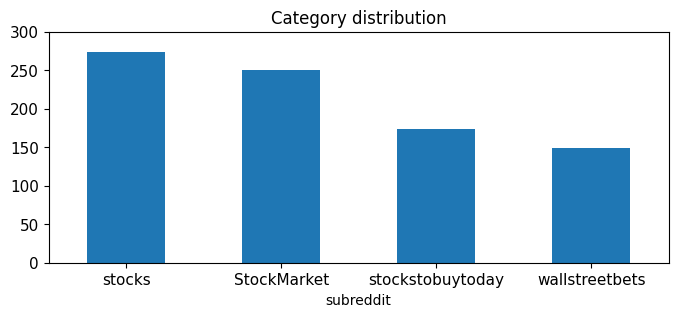

In [19]:
print(reddit_stock.subreddit.value_counts())

# plot barchart for X
reddit_stock.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 300],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

Exercise 7

subreddit
stocks              19
wallstreetbets      14
StockMarket          9
stockstobuytoday     8
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='subreddit'>

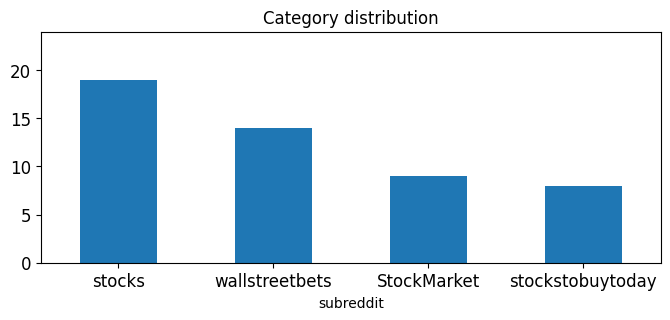

In [20]:
# Answer here
print(X.subreddit.value_counts())

# plot barchart for X_sample
X.subreddit.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, X.subreddit.value_counts().max()+5], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

Exercise 8

                  subreddit  subreddit
subreddit                             
stocks                  274         19
StockMarket             250          9
stockstobuytoday        174          8
wallstreetbets          149         14


<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

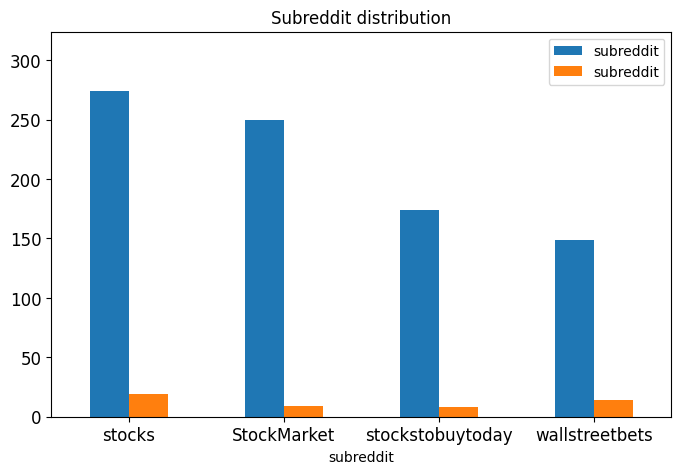

In [21]:
# Answer here

chart = pd.concat([reddit_stock['subreddit'].value_counts(), X['subreddit'].value_counts()], keys=['subreddit', 'subreddit'], axis=1)
print(chart)
chart.plot(kind = 'bar',
            title = 'Subreddit distribution',
            ylim = [0, chart.values.max()+50], 
            rot = 0, fontsize = 12, figsize = (8,5))

In [22]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /home/visharad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/visharad/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
# takes a like a minute or two to process

reddit_stock['unigrams'] = reddit_stock['text'].apply(lambda reddit_stock: dmh.tokenize_text(reddit_stock))

In [24]:
reddit_stock[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [25]:
list(reddit_stock[1:2]['unigrams'])

[['Stunt',
  'as',
  'in',
  'like',
  'why',
  'did',
  'they',
  'even',
  'make',
  'a',
  'big',
  'deal',
  'about',
  'starting',
  'it',
  'in',
  'the',
  'first',
  'place',
  '?',
  'No',
  'company',
  'should',
  'ever',
  'talk',
  'about',
  'politics',
  'ever',
  '.']]

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
R_counts = count_vect.fit_transform(reddit_stock.text) #learn the vocabulary and return document-term matrix
print(R_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [27]:
count_vect.get_feature_names_out()[1000:1005]

array(['crashes', 'crashing', 'crayola', 'crayon', 'crazy'], dtype=object)

In [28]:
len(count_vect.get_feature_names_out())

4346

In [29]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

Exercise 9

In [30]:
analyze(reddit_stock["text"][0])

['calls', 'on', 'retards']

In [31]:
R_counts.shape

(847, 4346)

In [32]:
print(R_counts[0:5, 0:100])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1 stored elements and shape (5, 100)>
  Coords	Values
  (3, 18)	3


In [33]:
R_counts[5:10, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

Exercise 10

In [34]:
record_indices = np.where(R_counts[9].toarray()[0] == 1)[0]
index = record_indices[8] # This will be 37
count_vect.get_feature_names_out()[index]

'now'

In [35]:
import seaborn as sns

In [36]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_01378',
 'term_02',
 'term_027',
 'term_03',
 'term_06',
 'term_08',
 'term_10',
 'term_100',
 'term_1000',
 'term_10000',
 'term_100k',
 'term_100x',
 'term_10k',
 'term_10ks',
 'term_10yr',
 'term_11',
 'term_116',
 'term_118']

In [37]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(reddit_stock.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [38]:
plot_z = R_counts[0:20, 0:20].toarray() #R_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

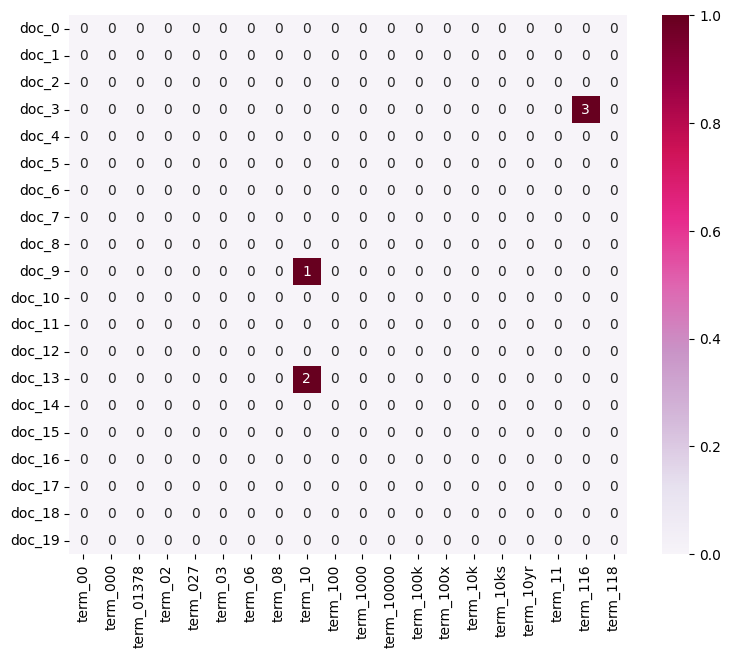

In [39]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Exercise 11

Original terms: 4346
After filtering (freq >= 3): 1226
Total documents in dataset: 847
Original vocabulary size: 4346
Filtered dataset shape: (847, 1226)


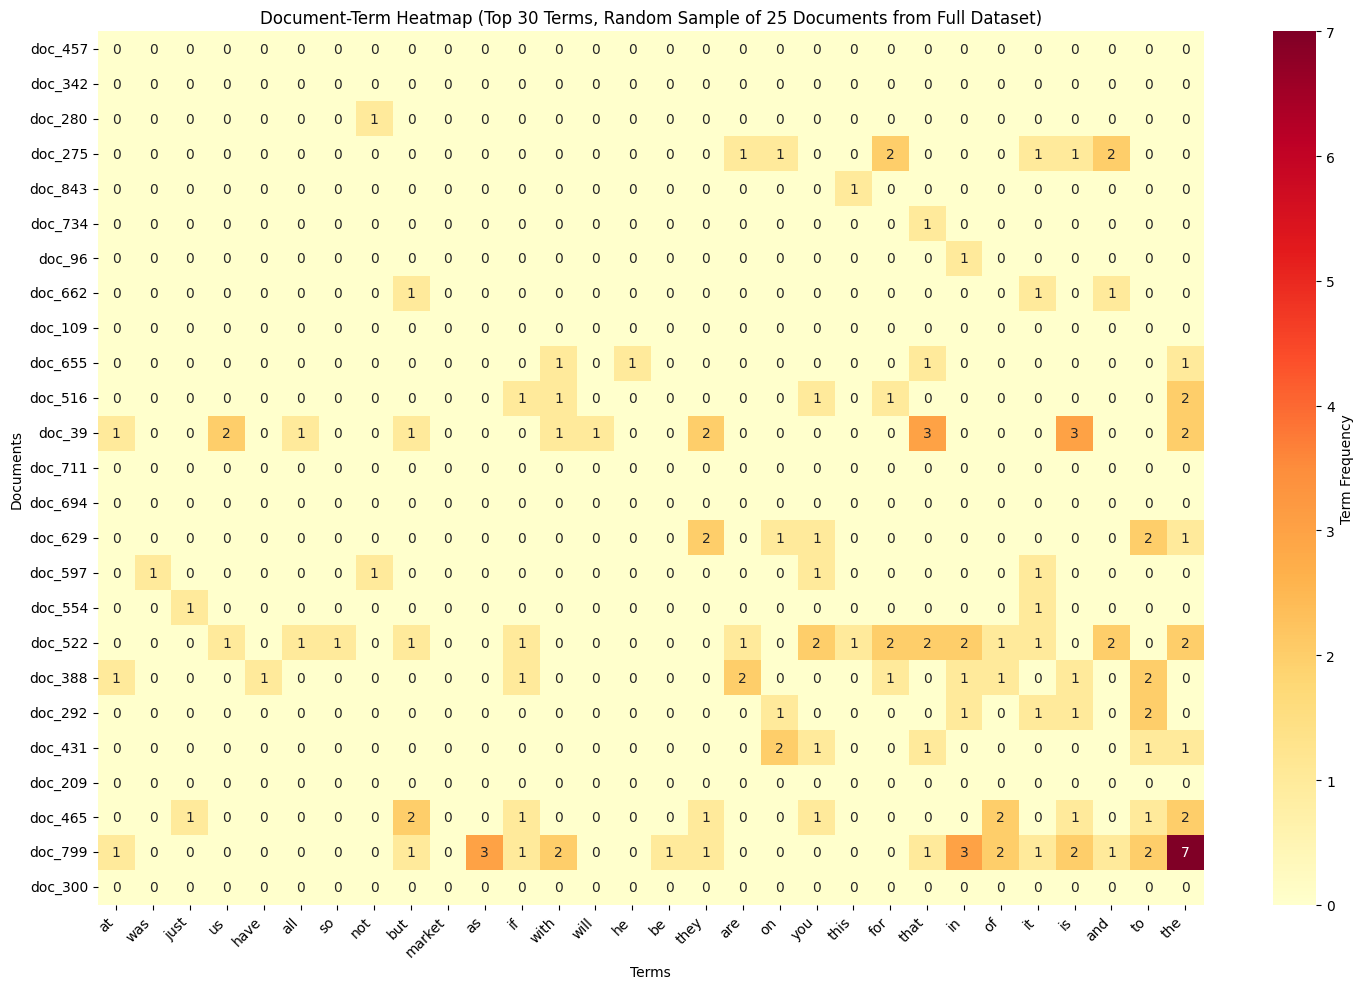

In [40]:
# USING THE ENTIRE DATASET - No artificial limits!
term_frequencies = R_counts.toarray().sum(axis=0)

# More selective mask: only keep terms that appear 3+ times across all documents
mask = term_frequencies >= 3  # This keeps more meaningful terms
filtered_terms = count_vect.get_feature_names_out()[mask]

print(f"Original terms: {len(count_vect.get_feature_names_out())}")
print(f"After filtering (freq >= 3): {len(filtered_terms)}")
print(f"Total documents in dataset: {R_counts.shape[0]}")
print(f"Original vocabulary size: {R_counts.shape[1]}")

# Filter the original matrix - USING ALL DOCUMENTS
plot_z = R_counts[:, mask].toarray()

# Build dataframe with filtered terms - ALL DOCUMENTS INCLUDED
plot_x = filtered_terms
plot_y = ["doc_"+ str(i) for i in list(reddit_stock.index)]
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

print(f"Filtered dataset shape: {df_todraw.shape}")

# For heatmap visualization, we need to sample since showing all documents would be unreadable
# But we'll sample from the ENTIRE dataset, not just first 20
plt.figure(figsize=(15, 10))

# Select top 30 most frequent terms for better visualization
top_term_indices = np.argsort(term_frequencies[mask])[-30:]
top_terms = filtered_terms[top_term_indices]

# Sample 25 documents from ENTIRE dataset for visualization
import numpy as np
np.random.seed(42)  # For reproducible results
sample_indices = np.random.choice(df_todraw.shape[0], size=min(25, df_todraw.shape[0]), replace=False)
sample_data = plot_z[sample_indices][:, top_term_indices]
sample_labels = [plot_y[i] for i in sample_indices]

# Create heatmap with annotations for better readability
ax = sns.heatmap(sample_data, 
                 xticklabels=top_terms,
                 yticklabels=sample_labels,
                 cmap="YlOrRd", 
                 annot=True, 
                 fmt='d',
                 cbar_kws={'label': 'Term Frequency'})

plt.title('Document-Term Heatmap (Top 30 Terms, Random Sample of 25 Documents from Full Dataset)')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,R_counts.shape[1]):
    term_frequencies.append(sum(R_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [42]:
term_frequencies = np.asarray(R_counts.sum(axis=0))[0]

In [43]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

Exercise 12

<Axes: >

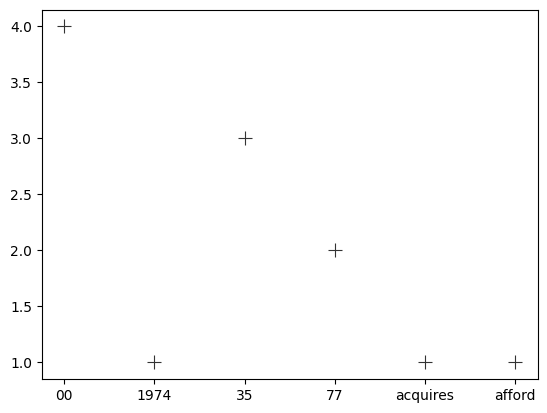

In [44]:
# Answer here
sns.scatterplot(x=count_vect.get_feature_names_out()[:300:50], 
            y=term_frequencies[:300:50],
               marker="+",
                s=100, color=".2")

Exercise 13

/tmp/ipykernel_10251/4064374469.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

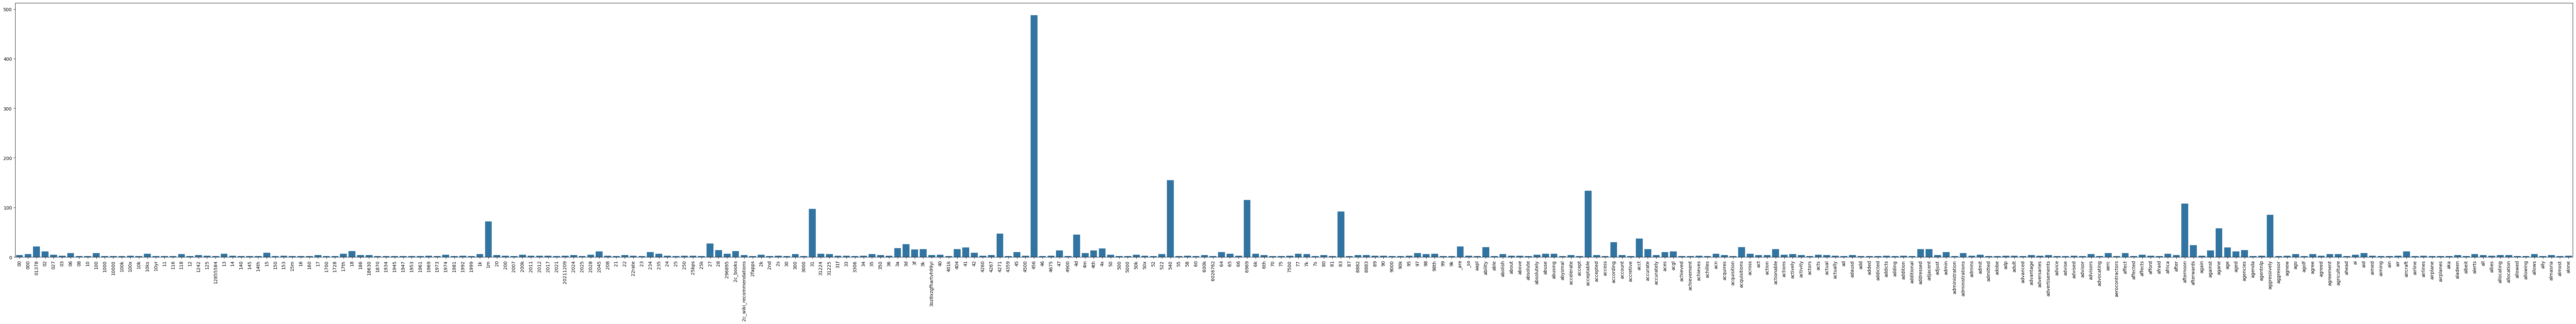

In [45]:
# Answer here


mask = term_frequencies > 1
terms_to_plot = count_vect.get_feature_names_out()[mask]
freq_to_plot = term_frequencies[mask]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=terms_to_plot[:300], 
            y=freq_to_plot[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

Exercise 14

/tmp/ipykernel_10251/4117956750.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

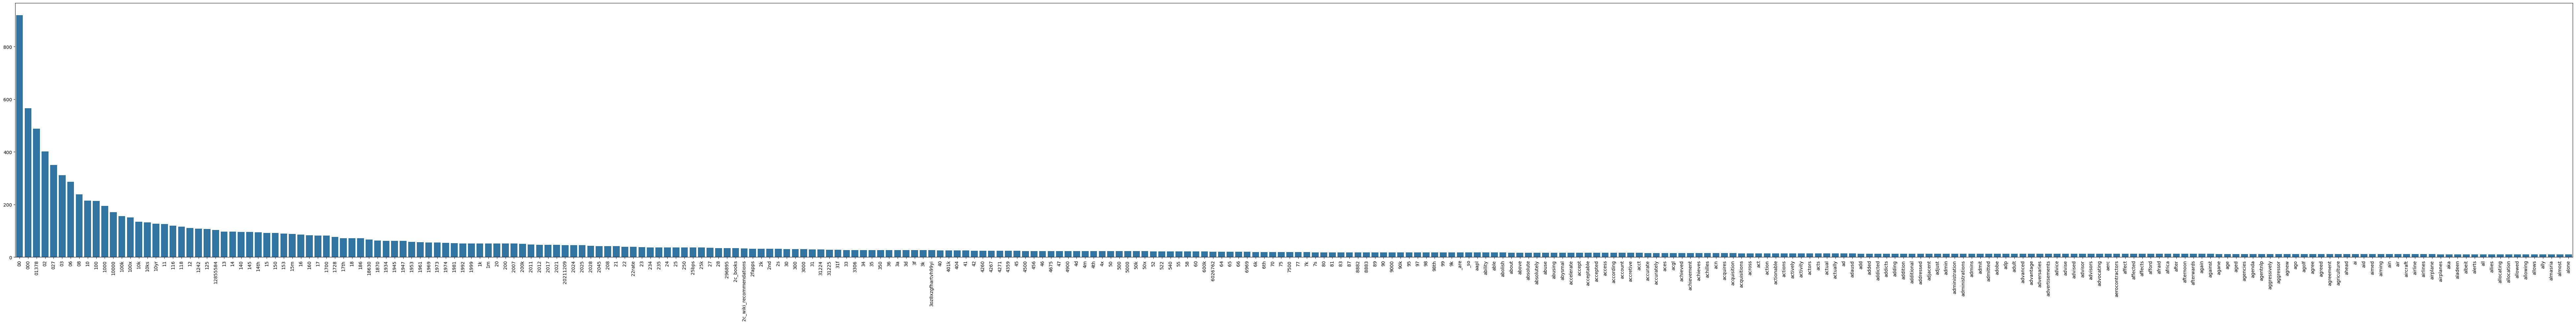

In [46]:
# Answer here
mask = np.argsort(term_frequencies)[::-1]

terms_to_plot = count_vect.get_feature_names_out()[mask]
freq_to_plot = term_frequencies[mask]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=terms_to_plot[:300], 
            y=freq_to_plot[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


In [47]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/tmp/ipykernel_10251/1516414146.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

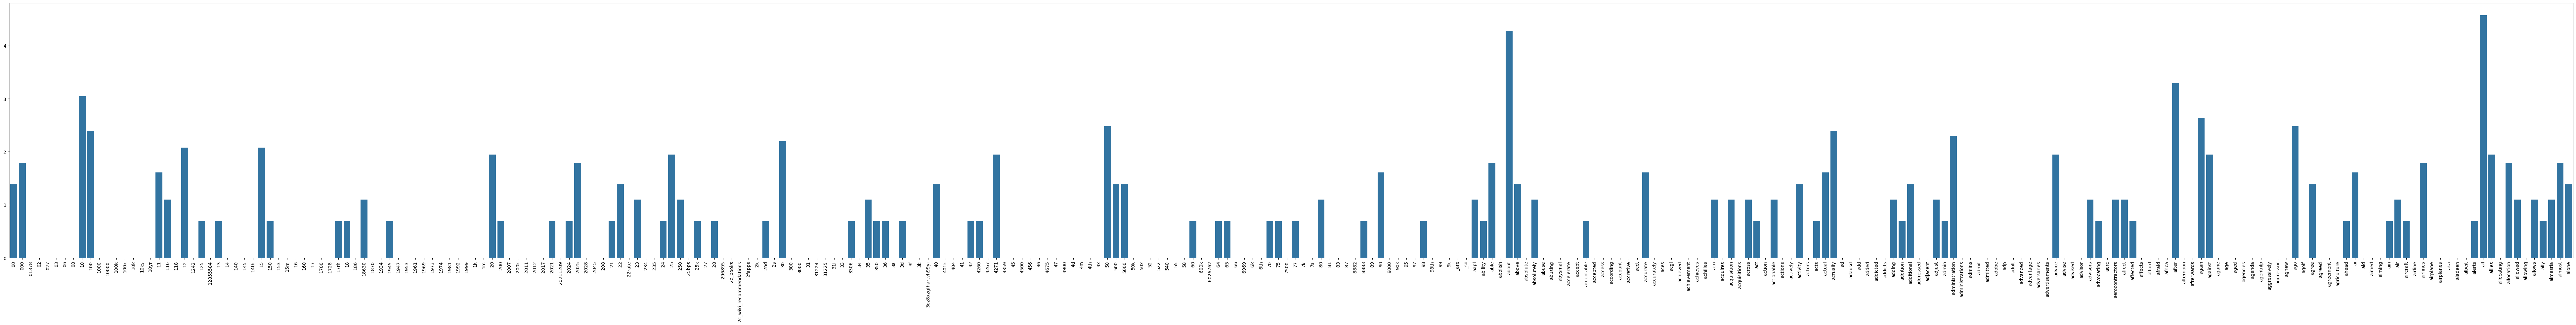

In [48]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

Exercise 15

/tmp/ipykernel_10251/2461544437.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

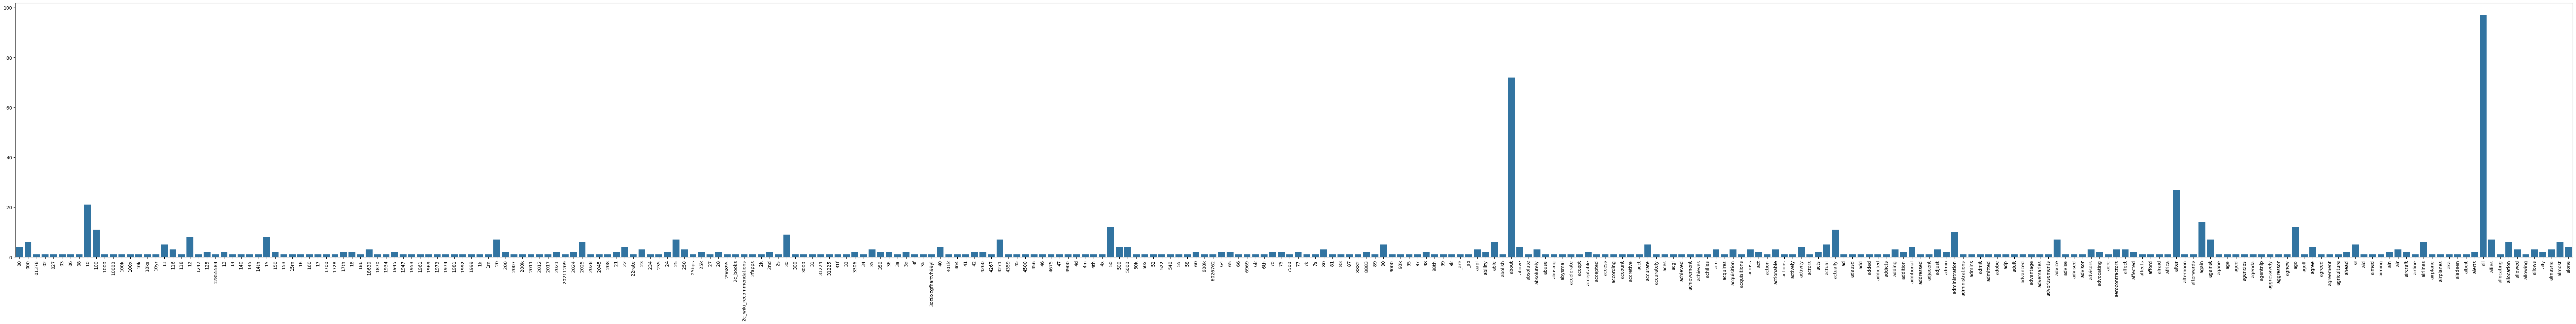

In [49]:
# Answer here
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


In [50]:
"The first graph (term_frequencies_log) is a very exagerated version of the second graph (term_frequencies). Using the first graph is much more visually appealing as it makes it a lot easier to visualize the dataset. In the 2nd graph, theres hardly any differene between a word with frequency 1 and 5, but this difference is clearly visible in the 2nd graph."

'The first graph (term_frequencies_log) is a very exagerated version of the second graph (term_frequencies). Using the first graph is much more visually appealing as it makes it a lot easier to visualize the dataset. In the 2nd graph, theres hardly any differene between a word with frequency 1 and 5, but this difference is clearly visible in the 2nd graph.'

# Phase 2

In [51]:
### Begin Assignment Here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = reddit_stock['subreddit'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = reddit_stock[reddit_stock['subreddit'] == category].copy()
category_dfs
# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [52]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category wallstreetbets:


,10,100,1000,10k,12,17th,186,18630,1934,1981,...,xi,year,years,yesterday,yet,yippee,you,your,yourself,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: wallstreetbets
Number of terms in bottom 1%: 9
Filtered terms: ['31224', '31225', '350', '1981', '1m', '20', '200k', '2012', '2021']


In [54]:
category_number=2 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category wallstreetbets we filter the following words:
Bottom 1.0% words: 
31224    1
31225    1
350      1
1981     1
1m       1
20       1
200k     1
2012     1
2021     1
dtype: int64
Top 5.0% words: 
market       8
still        8
with         8
time         8
re           8
she          8
make         8
up           9
good         9
no           9
puts         9
what         9
there        9
about        9
we          10
not         10
now         10
be          10
will        10
target      10
was         11
all         11
over        11
have        12
are         12
at          14
just        15
can         15
but         15
like        16
so          17
img         18
emote       18
t5_2th52    18
on          20
that        21
my          21
of          23
this        24
they        25
for         26
you         28
is          29
in          29
and         37
it          43
the         57
to          60
dtype: int64

For category StockMarket we filter the following words:
B

,00,000,01378,08,10,100,100k,11,116,118,...,yeah,year,years,yes,yesterday,yield,young,your,yup,zone
0,0,0,0,0,0,0,0,0,3,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Answer here
filtered_out_words = {}

for category in categories:
    original = set(filt_term_document_dfs[category].columns)
    remaining = set(term_document_dfs[category].columns)
    filtered_out_words[category] = original - remaining

common_filtered = set.intersection(*filtered_out_words.values())

print(common_filtered)
len(common_filtered)

{'that', 'was', 'good', 'so', 'just', 'be', 'like', 'can', 'my', 'there', 'to', 'but', 'at', 'are', 'on', 'the', 'market', 'is', 'have', 'it', 'you', 'of', 'will', 'with', 'this', 'they', 'in', 'up', 'not', 'for', 'now', 'about', 'and', 'what'}


34

In [56]:
all_filtered = set.union(*filtered_out_words.values())
unique_filtered = all_filtered - common_filtered
print(unique_filtered)
len(unique_filtered)

{'even', 'all', '1m', 'wow', '31224', 'tariffs', '2021', 'yea', '2045', 'go', 'salary', '1981', 'portfolio', 'been', 'do', 'than', 'highlighted', 'lithium', 'puts', 'hertz', 'here', 're', 'com', 'save', 'last', 'doing', '28', '2012', '1947', 'would', 'company', 'him', 'things', 'me', '404', 'our', 'see', 'xeqt', '31225', '235', 'today', 'one', 'yoyo', 'we', 'price', 'some', 'because', 'updated', 'wrote', 'going', '200k', 'companies', 'world', '456', 'should', 'new', 'stockbuyvest', 'target', '10', '70', 'make', 'too', '77', 'down', 'stock', 'back', '1961', 'everyone', '52', 'time', 'get', '20', 'their', 'img', '36', 'star', 'into', '10000', 'as', 'wants', 'when', 'no', 'he', 'investors', 'his', 'ww2', 'trade', 'doesn', 'any', 'its', '1953', 'out', 'people', 'daily', '350', 'them', 'from', 'future', 'analysis', 'much', '60', 'sell', 'over', 'other', 'x200b', '50x', 'could', 'still', 'helping', 'already', 'technology', '1870', 'scoop', 'ya', 'most', 'help', 'term', 'emote', 'by', '4d', '

183


The filtering process reveals both similarities and differences in the subreddits' vocabularies.

- **Similarities (Common Filtered):** Words removed from ALL categories are either generic English stop words (e.g., 'the', 'a', 'is') or domain-specific terms that are too common across all subreddits to be useful for differentiation (e.g., 'stock', 'market', 'price').

- **Differences (Unique Filtered):** Words removed from only SOME categories highlight the unique jargon of each subreddit. A term might be in the top 5% most frequent for one category (and thus get filtered there) but be less common and therefore kept in others, revealing the specific topics or slang of that particular community.


In [57]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


In [58]:
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)

builtins.open = safe_open


In [95]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=8
obj1 = alg.FPGrowth(iFile='td_freq_db_StockMarket.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_StockMarket= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_StockMarket))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9
Runtime: 0.0022504329681396484


In [96]:
obj1.save('freq_patterns_StockMarket_minSup8.txt') #save the patterns
frequentPatternsDF_StockMarket

,Patterns,Support
0,because,8
1,tariffs,8
2,well,8
3,then,8
4,why,9
5,way,9
6,want,9
7,than,9
8,other,10


In [83]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj2 = alg.FPGrowth(iFile='td_freq_db_stocks.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_stocks= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stocks))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 113
Runtime: 0.007355451583862305


In [85]:
obj2.save('freq_patterns_stocks_minSup6.txt') #save the patterns
frequentPatternsDF_stocks

,Patterns,Support
0,few,6
1,lot,6
2,high,6
3,new,6
4,call,6
...,...,...
108,bad,10
109,know,10
110,also,11
111,since,11


In [97]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=8
obj3 = alg.FPGrowth(iFile='td_freq_db_stockstobuytoday.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_stockstobuytoday= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stockstobuytoday))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 3
Runtime: 0.0018444061279296875


In [98]:
obj2.save('freq_patterns_stockstobuytoday_minSup8.txt') #save the patterns
frequentPatternsDF_stockstobuytoday

,Patterns,Support
0,highlights,8
1,think,8
2,weekly,8


In [99]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=8
obj4 = alg.FPGrowth(iFile='td_freq_db_wallstreetbets.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_wallstreetbets= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_wallstreetbets))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2
Runtime: 0.0014820098876953125


In [100]:
obj2.save('freq_patterns_stockstobuytoday_minSup8.txt') #save the patterns
frequentPatternsDF_stockstobuytoday

,Patterns,Support
0,highlights,8
1,think,8
2,weekly,8


In [101]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_stockstobuytoday, frequentPatternsDF_wallstreetbets, frequentPatternsDF_StockMarket, frequentPatternsDF_stocks]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

       Patterns  Support
120        also       11
122         get       11
121       since       11
116         him       10
119        know       10
..          ...      ...
31        paper        6
27   completely        6
24       trying        6
25         cash        6
26         come        6

[123 rows x 2 columns]
Number of patterns discarded: 4


In [102]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
reddit_tdm = count_vect.fit_transform(reddit_stock['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
reddit_stock['tokenized_text'] = reddit_stock['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=reddit_stock.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = reddit_stock['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(reddit_tdm.toarray(), columns=terms, index=reddit_stock.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,did,without,own,investors,chinese,paper,completely,trying,cash,come
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Exercise 17

In [103]:
from PAMI.frequentPattern.topk import FAE  as alg
import pandas as pd         #Start the mining process

In [104]:
# Answer Here
dataset = "td_freq_db_stocks.csv"
seperator='\t'
minimumSupportCountList = [500, 1000, 1500]
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])


In [105]:
for minSupCount in minimumSupportCountList:
    obj5 = alg.FAE(dataset, k=minSupCount, sep=seperator)
    obj5.mine()
    patterns = obj5.getPatternsAsDataFrame()
  
    print(f"Patterns for k value {minSupCount}")
    print(patterns)
    print()
    #store the results in the data frame
    result.loc[result.shape[0]] = ["FAE", minSupCount, len(obj5.getPatterns()), obj5.getRuntime(), obj5.getMemoryRSS()]


 TopK frequent patterns were successfully generated using FAE algorithm.
Patterns for k value 500
        Patterns  Support
0           also       11
1          since       11
2            get       11
3            him       10
4           shit       10
..           ...      ...
495        crash        2
496       decide        2
497  essentially        2
498       having        2
499       reacts        2

[500 rows x 2 columns]



KeyboardInterrupt: 

In [ ]:
print(result)

In [106]:
#Import the libraries
from PAMI.frequentPattern.maximal import MaxFPGrowth  as MFG #import the algorithm

#Specify the input parameters
minimumSupportCountList = [3, 6, 9]

result2 = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])


In [107]:
for minSupCount in minimumSupportCountList:
    obj6 = MFG.MaxFPGrowth(dataset, minSup=minSupCount, sep=seperator)
    obj6.mine()
    print(f"Patterns for minimum threshold value {minSupCount}")
    patterns2 = obj6.getPatternsAsDataFrame()
    
    print(patterns2)
    print()
    result2.loc[result2.shape[0]] = ['MaxFPGrowth', minSupCount, len(obj6.getPatterns()), obj6.getRuntime(), obj6.getMemoryRSS()]

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Patterns for minimum threshold value 3
          Patterns  Support
0           month         3
1      amzn apple         3
2          amazon         3
3           sides         3
4            rate         3
..             ...      ...
355  seems reason         3
356       country         9
357         still         9
358            ve         9
359          know        10

[360 rows x 2 columns]

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Patterns for minimum threshold value 6
      Patterns  Support
0          50         6
1    treasury         6
2         won         6
3       media         6
4        sure         6
..         ...      ...
108      shit        10
109       him        10
110       get        11
111     since        11
112      also        11

[113 rows x 2 columns]

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorit

In [108]:
print(result2)

     algorithm  minSup  patterns   runtime     memory
0  MaxFPGrowth       3       360  0.016341  785821696
1  MaxFPGrowth       6       113  0.008333  785821696
2  MaxFPGrowth       9        19  0.003182  785821696


Patterns:

If we were to compare the newely implemented algorithms i.e. FAE Top-K and MaxFPGrowth with FPGrowth, we can see that the patterns discovered in MaxFP Growth is more precise than FPGrowth as it only finds the maximal elements. Whereas we can't really compare the number of patterns in FAE Top-K since we select the number of patterns to find.

Runtimes:
- Fastest: MaxFPGrowth with minSup=9 (0.068s) - finds only maximal patterns
- FPGrowth is very efficient (0.104s) for finding all frequent patterns with minSup=9
- FAE Top-K runtime increases linearly with k value (more patterns = more time)
- MaxFPGrowth with minSup=3 is the slowest (11.1s) because it needs to explore more combinations to find maximal patterns

In [109]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

Exercise 18

In [110]:
#Answer Here
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

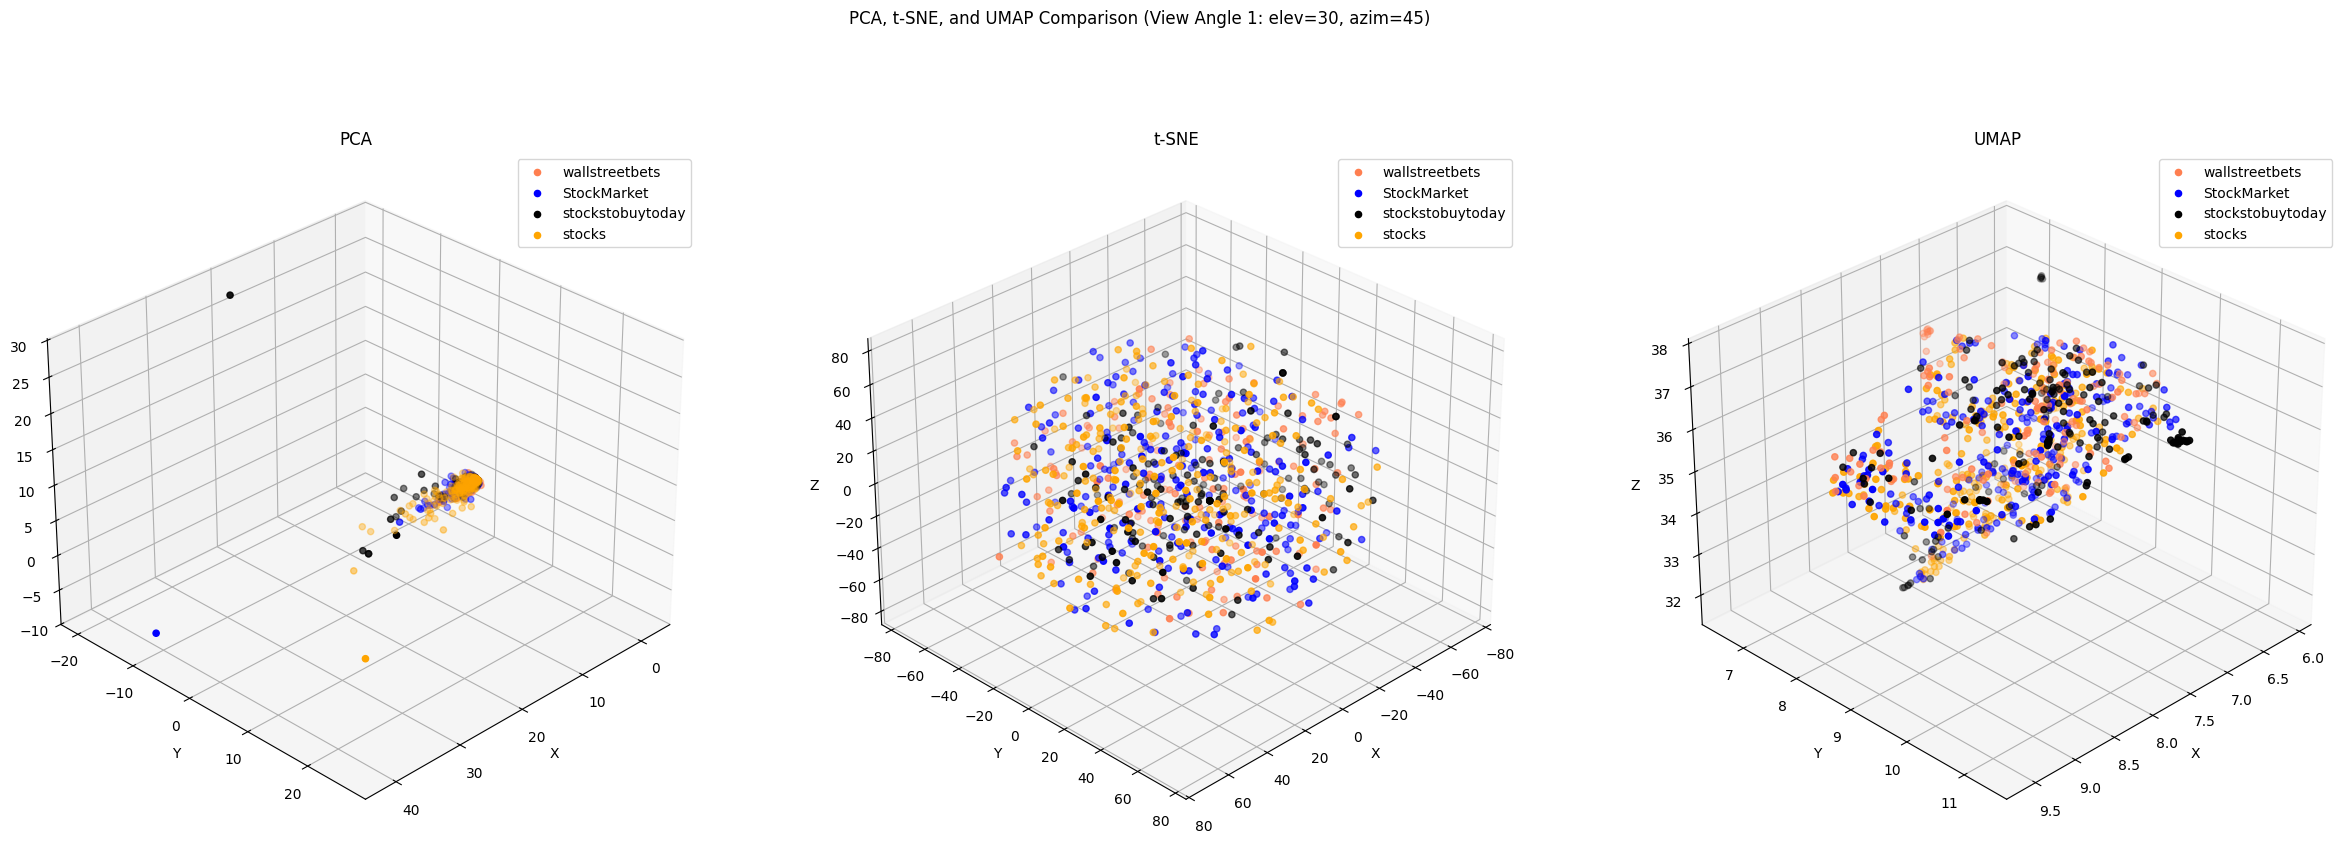

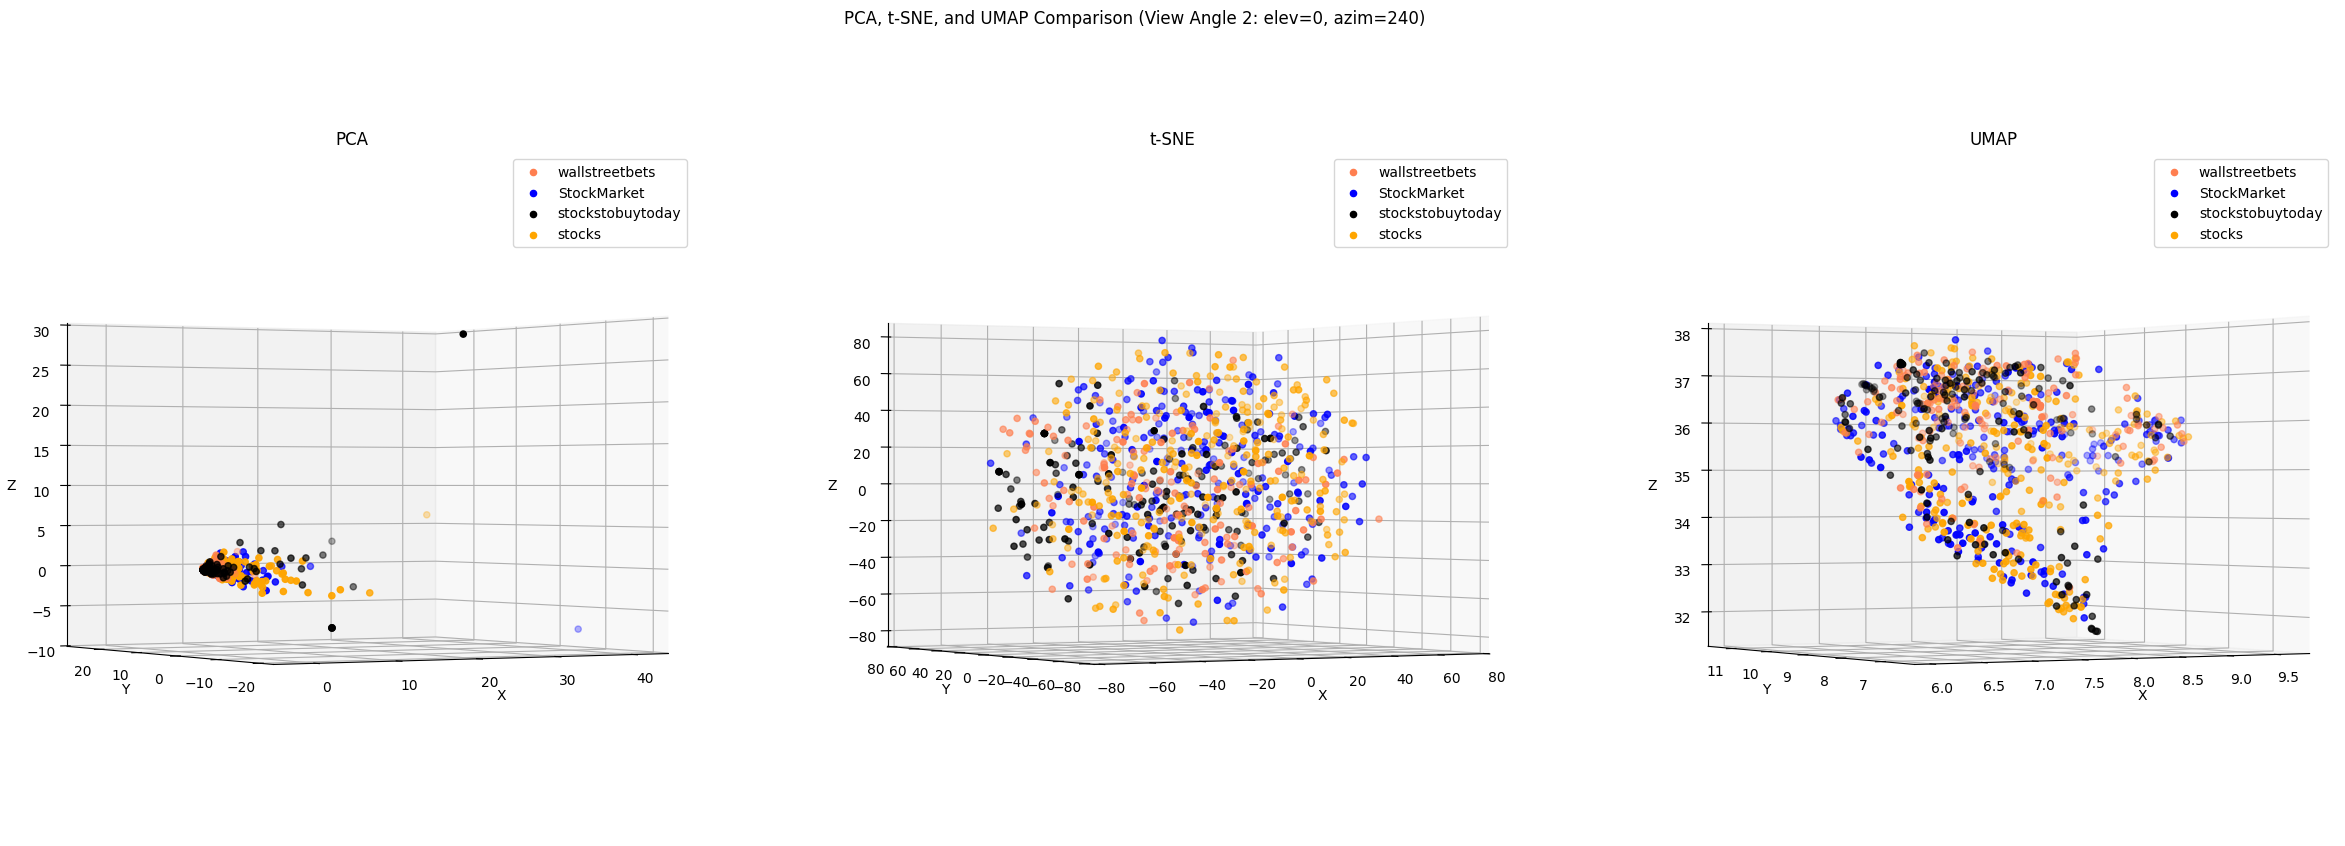

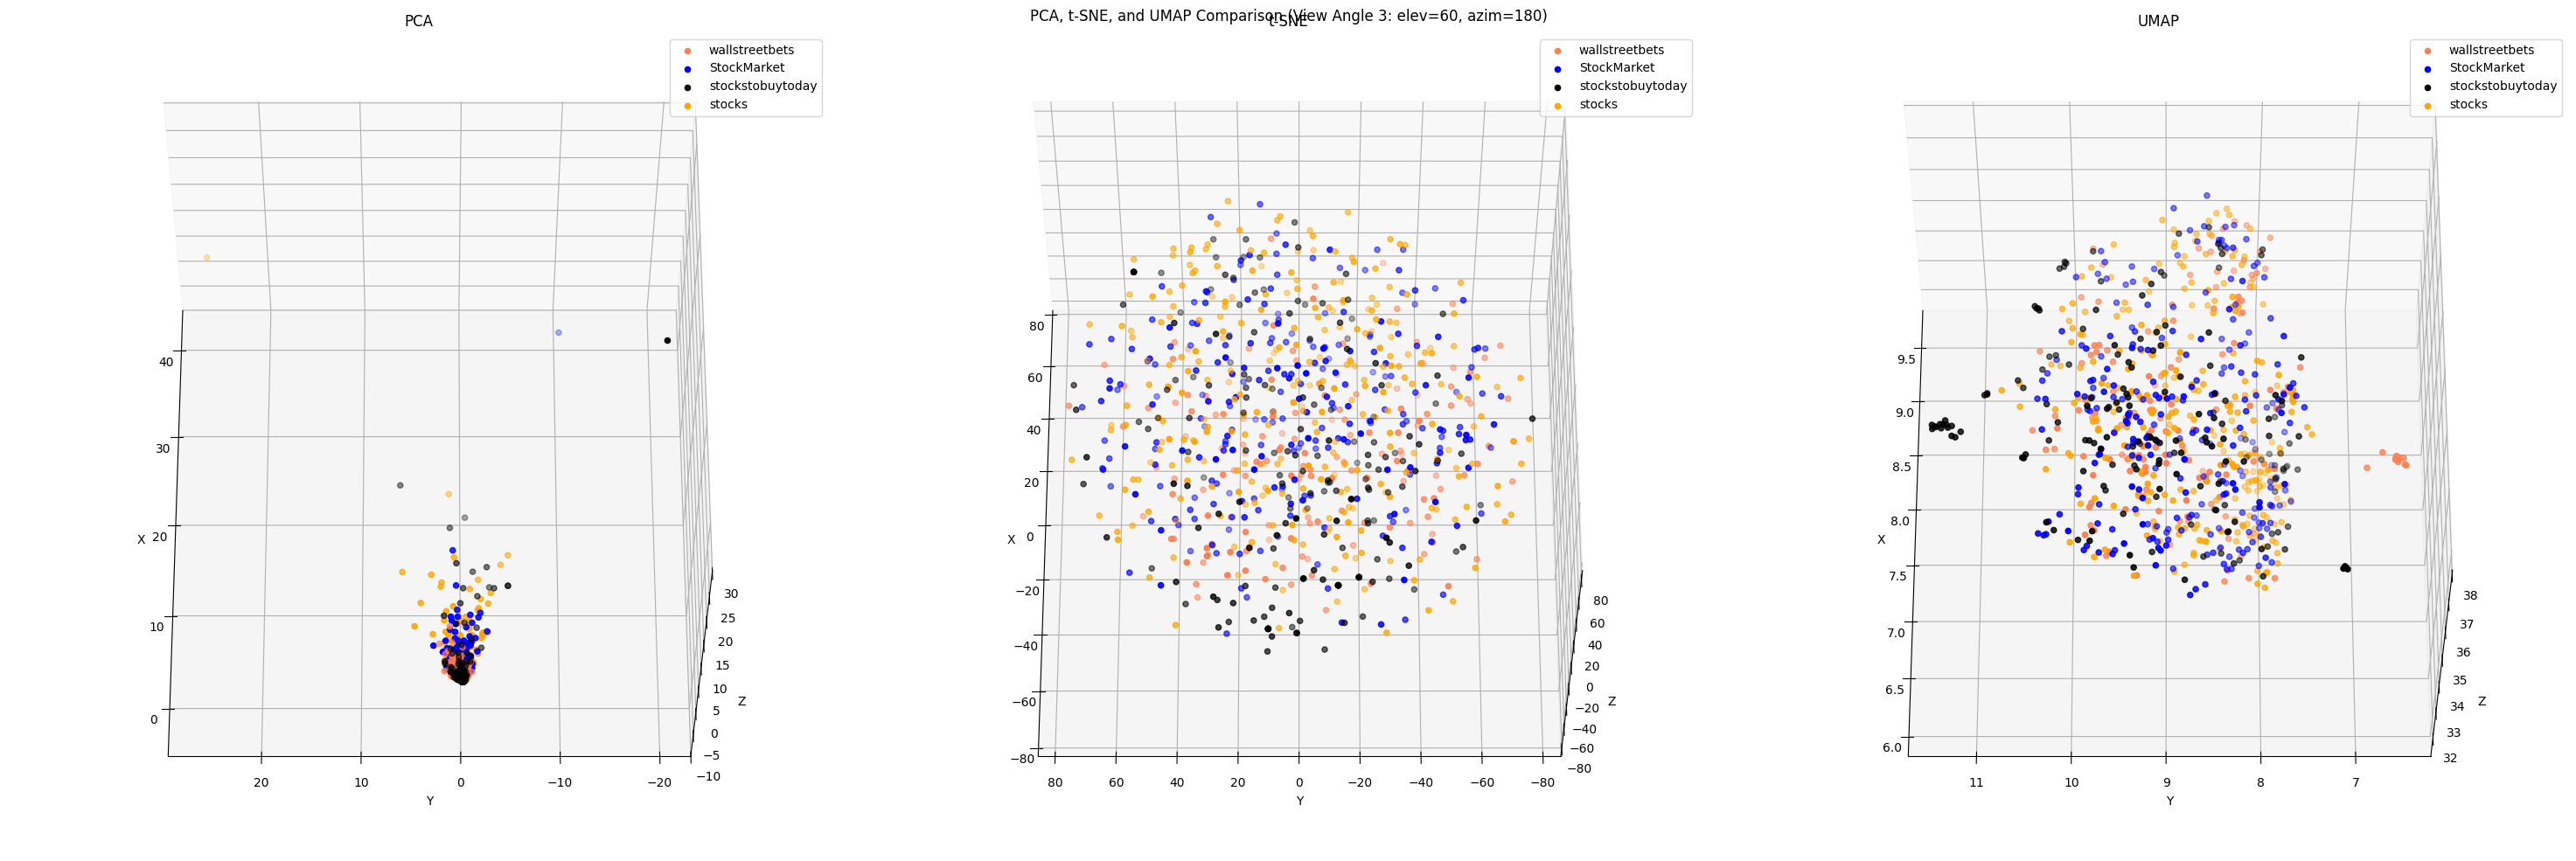

In [114]:
# Plot the results in subplots
from mpl_toolkits.mplot3d import Axes3D 
col = ['coral', 'blue', 'black', 'orange']
categories = reddit_stock['subreddit'].unique() 

# fig, axes = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})
# fig.suptitle('PCA, t-SNE, and UMAP Comparison in 3D')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title, elev=30, azim=45):
    for c, category in zip(col, categories):
        xs = X_reduced[reddit_stock['subreddit'] == category].T[0]
        ys = X_reduced[reddit_stock['subreddit'] == category].T[1]
        zs = X_reduced[reddit_stock['subreddit'] == category].T[2]

        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.view_init(elev=elev, azim=azim)

angles = [
    (30, 45),
    (0, 240),
    (60, 180)
]



for i, (elev, azim) in enumerate(angles):
    fig, axes = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})
    fig.suptitle(f'PCA, t-SNE, and UMAP Comparison (View Angle {i+1}: elev={elev}, azim={azim})')
    
    plot_scatter(axes[0], X_pca_aug, 'PCA', elev, azim)
    plot_scatter(axes[1], X_tsne_aug, 't-SNE', elev, azim)
    plot_scatter(axes[2], X_umap_aug, 'UMAP', elev, azim)
    


plt.tight_layout()
plt.show()

 

In [116]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(reddit_stock.subreddit)

,neg_label,0
,pos_label,1
,sparse_output,False


In [117]:
reddit_stock['bin_category'] = mlb.transform(reddit_stock['subreddit']).tolist()
reddit_stock[0:15]

,type,datetime,subreddit,title,author,upvotes,text,label,unigrams,tokenized_text,bin_category
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,0,Calls on retards,-1.0,"[Calls, on, retards]","{retards, Calls, on}","[0, 0, 0, 1]"
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,Stunt as in like why did they even make a big ...,0.0,"[Stunt, as, in, like, why, did, they, even, ma...","{even, did, big, like, Stunt, should, place?, ...","[0, 0, 0, 1]"
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,Btankersly66,1,Seeing lots of red in the ticker.,0.0,"[Seeing, lots, of, red, in, the, ticker, .]","{Seeing, red, in, of, ticker., the, lots}","[1, 0, 0, 0]"
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,emiljenfn,30,Vision Marine Technologies Inc. is rewriting t...,1.0,"[Vision, Marine, Technologies, Inc., is, rewri...","{passion, speed, water-speed, electric, Torren...","[0, 0, 1, 0]"
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,1,He didn’t say thank you.,-1.0,"[He, didn, ’, t, say, thank, you, .]","{thank, didn’t, you., He, say}","[1, 0, 0, 0]"
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,16,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","{puss, ejaculate, wet, in, luck, warm, tonight...","[0, 0, 0, 1]"
6,comment,2025-04-11 12:37:23,stocks,Is the market in complete denial right now?,stoniey84,5,Trump will respond to china increasing their t...,-1.0,"[Trump, will, respond, to, china, increasing, ...","{even, all, starting., going, companies, repor...","[0, 1, 0, 0]"
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,-3,Confirmed not a trap. Its been like this for p...,0.0,"[Confirmed, not, a, trap, ., Its, been, like, ...","{word, just, like, spread, 2, been, have, let,...","[0, 0, 0, 1]"
8,comment,2021-02-01 15:36:32,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,1,Am I the only one seeing the cup & handle brea...,1.0,"[Am, I, the, only, one, seeing, the, cup, &, h...","{was, Am, line, Follow, new, Thursday., high.,...","[0, 1, 0, 0]"
9,comment,2021-12-31 16:29:49,stockstobuytoday,Any cheap stocks under $10?,Zumuru,2,HLGN is $10. Hurry and catch it now before it ...,1.0,"[HLGN, is, $, 10, ., Hurry, and, catch, it, no...","{catch, shoots, $10., Hurry, HLGN, moon!, the,...","[0, 0, 1, 0]"


Exercise 19

In [121]:
# Answer here
reddit_stock['bin_category'] = mlb.transform(reddit_stock['subreddit']).tolist()

In [122]:
reddit_stock[:10]

,type,datetime,subreddit,title,author,upvotes,text,label,unigrams,tokenized_text,bin_category
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,0,Calls on retards,-1.0,"[Calls, on, retards]","{retards, Calls, on}","[0, 0, 0, 1]"
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,Stunt as in like why did they even make a big ...,0.0,"[Stunt, as, in, like, why, did, they, even, ma...","{even, did, big, like, Stunt, should, place?, ...","[0, 0, 0, 1]"
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,Btankersly66,1,Seeing lots of red in the ticker.,0.0,"[Seeing, lots, of, red, in, the, ticker, .]","{Seeing, red, in, of, ticker., the, lots}","[1, 0, 0, 0]"
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,emiljenfn,30,Vision Marine Technologies Inc. is rewriting t...,1.0,"[Vision, Marine, Technologies, Inc., is, rewri...","{passion, speed, water-speed, electric, Torren...","[0, 0, 1, 0]"
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,1,He didn’t say thank you.,-1.0,"[He, didn, ’, t, say, thank, you, .]","{thank, didn’t, you., He, say}","[1, 0, 0, 0]"
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,16,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","{puss, ejaculate, wet, in, luck, warm, tonight...","[0, 0, 0, 1]"
6,comment,2025-04-11 12:37:23,stocks,Is the market in complete denial right now?,stoniey84,5,Trump will respond to china increasing their t...,-1.0,"[Trump, will, respond, to, china, increasing, ...","{even, all, starting., going, companies, repor...","[0, 1, 0, 0]"
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,-3,Confirmed not a trap. Its been like this for p...,0.0,"[Confirmed, not, a, trap, ., Its, been, like, ...","{word, just, like, spread, 2, been, have, let,...","[0, 0, 0, 1]"
8,comment,2021-02-01 15:36:32,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,1,Am I the only one seeing the cup & handle brea...,1.0,"[Am, I, the, only, one, seeing, the, cup, &, h...","{was, Am, line, Follow, new, Thursday., high.,...","[0, 1, 0, 0]"
9,comment,2021-12-31 16:29:49,stockstobuytoday,Any cheap stocks under $10?,Zumuru,2,HLGN is $10. Hurry and catch it now before it ...,1.0,"[HLGN, is, $, 10, ., Hurry, and, catch, it, no...","{catch, shoots, $10., Hurry, HLGN, moon!, the,...","[0, 0, 1, 0]"


No, it does not work as all the elements in the bin_category array are set to 0.

In [123]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = reddit_stock.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = reddit_stock.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = reddit_stock.iloc[500]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [124]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
['Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.']
['Everyone is talking about the Bond market. But the rates for the bond market are still lower than the rates they had earlier this year.\n\nWhat is everyone talking about?']


In [125]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [126]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.109109
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.142857
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/tmp/ipykernel_10251/452772485.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
/tmp/ipykernel_10251/452772485.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
/tmp/ipykernel_10251/452772485.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 2 and 3: %(x)

Exercise 20

In [132]:
#Answer
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = reddit_stock.iloc[250]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = reddit_stock.iloc[550]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = reddit_stock.iloc[700]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [133]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Hey everyone, i was looking into a new company to the CSE Syntheia Corp and wanted to share some info on them\n\nThey use advanced AI to improve customer service, helping call centers and restaurants manage tasks more easily. Their solutions, like AgentNLP and OrderNLP, streamline communication, reduce repetitive work, and enhance the customer experience.\n\nUse cases:\n\nRestaurants: Syntheia can manage all incoming calls, ensuring guests have a smooth experience and reservations are handled efficiently.\n\nReal Estate Offices: Having a virtual receptionist means no calls are missed, and all property listings can be easily communicated to potential buyers.\n\nDoctors' Clinics: Syntheia responds to patient inquiries at any hour, booking appointments and providing essential guidance without delay.\n\nAnd many more + stuff in the works\n\nTLDR: \n\nSyntheia is changing the way businesses handle customer service by using smart AI tools to make communication easier. Their technology help

In [134]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [129]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/tmp/ipykernel_10251/452772485.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
/tmp/ipykernel_10251/452772485.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
/tmp/ipykernel_10251/452772485.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 2 and 3: %(x)

Since 2 out of the 3 text references are smaller than 1 sentence, we actually don't find any relation/patterns between these 3 texts.

In [138]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
categories = reddit_stock['subreddit'].unique()
subreddit_mapping = {i: cat for i, cat in enumerate(categories)}

# Convert the numerical category labels to text labels
target_names = [subreddit_mapping[label] for label in sorted(subreddit_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, reddit_stock['subreddit'], test_size=0.3, random_state=42)

In [139]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
X_test

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5529411764705883

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.5570    0.6111    0.5828        72
     StockMarket     0.4885    0.7356    0.5872        87
stockstobuytoday     0.7826    0.3673    0.5000        49
          stocks     0.6818    0.3191    0.4348        47

        accuracy                         0.5529       255
       macro avg     0.6275    0.5083    0.5262       255
    weighted avg     0.6000    0.5529    0.5411       255



Exercise 21

In [144]:
#Answer



# Split the data into training and testing sets (70% train, 30% test)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, reddit_stock['subreddit'], test_size=0.3, random_state=42)


In [145]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_aug, y_train_aug)

# Make predictions on the test set
y_pred_aug = nb_classifier.predict(X_test_aug)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Accuracy: 0.5294117647058824

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.5122    0.5833    0.5455        72
     StockMarket     0.4803    0.7011    0.5701        87
stockstobuytoday     0.7391    0.3469    0.4722        49
          stocks     0.6522    0.3191    0.4286        47

        accuracy                         0.5294       255
       macro avg     0.5960    0.4876    0.5041       255
    weighted avg     0.5707    0.5294    0.5182       255



Exercise 22

In [147]:
"The augmented TDM (with frequent patterns) shows lower accuracy (~52%) compared to the original TDM, indicating that the frequent pattern features may be introducing noise or overfitting rather than capturing useful discriminative information. This suggests that for this particular dataset and classifier, the raw term frequencies alone provide better classification performance than when combined with pattern-based features."

'The augmented TDM (with frequent patterns) shows lower accuracy (~52%) compared to the original TDM, indicating that the frequent pattern features may be introducing noise or overfitting rather than capturing useful discriminative information. This suggests that for this particular dataset and classifier, the raw term frequencies alone provide better classification performance than when combined with pattern-based features.'

In [150]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, reddit_stock['subreddit'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.4392156862745098

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.4156    0.4444    0.4295        72
     StockMarket     0.4930    0.4023    0.4430        87
stockstobuytoday     0.5581    0.4898    0.5217        49
          stocks     0.3281    0.4468    0.3784        47

        accuracy                         0.4392       255
       macro avg     0.4487    0.4458    0.4432       255
    weighted avg     0.4533    0.4392    0.4424       255



Exercise 23



1. **High Dimensionality Problem**: Text data has very high dimensionality (thousands of features/words). Decision Trees struggle with high-dimensional sparse data because:
   - They need to make split decisions on individual features
   - With so many features, finding optimal splits becomes computationally expensive
   - The tree can become very deep and complex, leading to overfitting

2. **Sparse Feature Space**: Text data represented as TDM is extremely sparse (most entries are 0). Decision Trees:
   - Don't handle sparse data as efficiently as probabilistic models
   - May create splits based on features that appear rarely, leading to poor generalization
   - Naive Bayes naturally handles sparsity by computing probabilities across all features simultaneously

3. **Feature Independence Assumption Works Well for Text**: Naive Bayes assumes feature independence, which, despite being unrealistic, actually works surprisingly well for text classification because:
   - It smooths out noise by considering all features together
   - It's less prone to overfitting on sparse, high-dimensional data
   - The conditional independence assumption acts as a regularization mechanism

4. **Overfitting on Training Data**: Decision Trees without proper regularization (pruning, max_depth limits) tend to:
   - Memorize training data patterns that don't generalize
   - Create overly complex decision boundaries
   - Perform poorly on unseen test data, especially with limited training samples

5. **Small Dataset Size**: With only ~847 documents split into 4 categories:
   - Decision Trees don't have enough samples to learn robust decision rules
   - Naive Bayes is more sample-efficient due to its simpler model assumptions
   - The test set (30%) may not be representative enough for complex tree structures

**Potential Solutions:**
- Use ensemble methods (Random Forest, Gradient Boosting) instead of single Decision Tree
- Apply dimensionality reduction before training
- Tune hyperparameters (max_depth, min_samples_split, min_samples_leaf)
- Use feature selection to reduce dimensionality

In [152]:
#Answer
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, reddit_stock['subreddit'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_aug, y_train_aug)

# Predict and evaluate
y_pred_aug = dt_classifier.predict(X_test_aug)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.38823529411764707

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.3372    0.4028    0.3671        72
     StockMarket     0.4783    0.3793    0.4231        87
stockstobuytoday     0.5556    0.4082    0.4706        49
          stocks     0.2656    0.3617    0.3063        47

        accuracy                         0.3882       255
       macro avg     0.4092    0.3880    0.3918       255
    weighted avg     0.4141    0.3882    0.3949       255



Using the augmented matrix instead of the originally used TDM actually worsened the accuracy from 43% to 33%. 

The possible reason for the same could be the fact that the decision tree failed to grasp the relationship between the added patterns, instead it was just added more dimensionality to the data, making it even more complicated.

Exercise 25


I think it depends upon the type of data we are using. If they data is very convulated and has multiple dimensions, we should use something like naive bayes, but if we are dealing with smaller/less complicated data, using decision trees might be the better option.